Epoch 1/3
1875/1875 [==============================] - 11s 2ms/step - loss: 0.2622 - accuracy: 0.9237
Epoch 2/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1065 - accuracy: 0.9665: 0s - loss: 0.108
Epoch 3/3
313/313 [==============================] - 1s 1ms/step - loss: 0.1021 - accuracy: 0.9680
0.9679999947547913
0.10213106125593185

==== Dataset telah di Training ====

percobaan ke- 1
----------------
Hasil Prediksi :  3
----------------


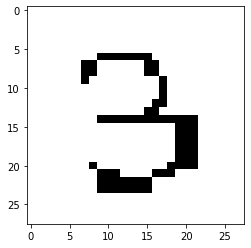

percobaan ke- 2
----------------
Hasil Prediksi :  8
----------------


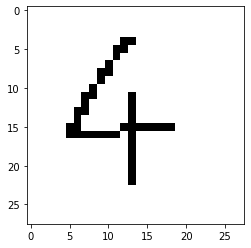

percobaan ke- 3
----------------
Hasil Prediksi :  1
----------------


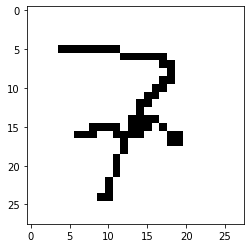

percobaan ke- 4
----------------
Hasil Prediksi :  5
----------------


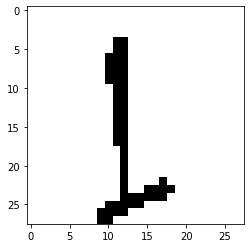

percobaan ke- 5
----------------
Hasil Prediksi :  0
----------------


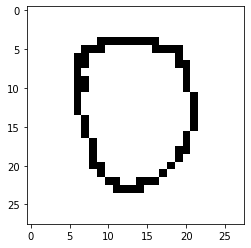

percobaan ke- 6
----------------
Hasil Prediksi :  5
----------------


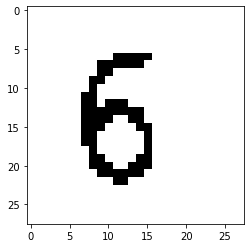

percobaan ke- 7
----------------
Hasil Prediksi :  5
----------------


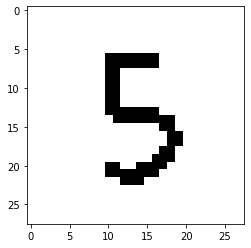

percobaan ke- 8
----------------
Hasil Prediksi :  5
----------------


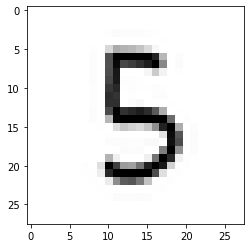

In [8]:
from cv2 import data
import pandas as pd

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import PIL
from PIL import Image

from tkinter import messagebox
from tkinter import *


def ConvertBinary():
    # menjadikan data input kedalam binner
    dataset_name = datasetname_Entry.get()
    datasave_name = datasavename_Entry.get()
    print(dataset_name)
    basewidth = 28
    img = PIL.Image.open(f'input_img\\{dataset_name}')
    wpercent = (basewidth/float(img.size[0]))
    img = img.resize((basewidth, basewidth), PIL.Image.ANTIALIAS)
    img.save(f'test_img\\{datasave_name}.png')
    img = cv.imread(f'test_img\\{datasave_name}.png')
    ret, thresh = cv.threshold(img, 125, 255, cv.THRESH_BINARY)
    cv.imwrite(f'test_img\\{datasave_name}.png', thresh)
    cv.imshow('Threshold', thresh)
    print("Sukses Mengkonversi Binner")
    cv.waitKey(0)
    cv.destroyAllWindows()


def TrainData():
    datapredict_name = datapredict_Entry.get()
    import tensorflow as tf
    from tensorflow.python.keras.metrics import accuracy
    mnist = tf.keras.datasets.mnist
    # CNN Dataset train
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    x_train = tf.keras.utils.normalize(x_train, axis=1)
    x_test = tf.keras.utils.normalize(x_test, axis=1)

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
    model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=3)

    # hasil loss dan akurasi
    loss, accuracy = model.evaluate(x_test, y_test)
    print(accuracy)
    print(loss)
    print("\n==== Dataset telah di Training ====\n")

    for x in range(1, int(datapredict_name)):
        # membaca data test open cv
        print("percobaan ke-", x)
        # all of it and 1st and last one
        img = cv.imread(f'test_img\\{x}.png')[:, :, 0]
        # invert image
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print("----------------")
        print("Hasil Prediksi : ", np.argmax(prediction))
        print("----------------")
        # modal
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()


def close_app():
    msg = messagebox.askquestion(
        "Keluar", "Apakah Anda Yakin Ingin Keluar ?")
    if msg == 'yes':
        root.destroy()


root = Tk()

# app title
root.title("Pengenalan Tulisan Tangan CNN")

# input from dari user
K_Entry = Entry(root, width=30, bg='pale goldenrod',
                borderwidth=1, relief="solid")
datasetname_Entry = Entry(
    root, width=30, bg='pale goldenrod', borderwidth=1, relief="solid")
datasavename_Entry = Entry(
    root, width=30, bg='pale goldenrod', borderwidth=1, relief="solid")
datapredict_Entry = Entry(
    root, width=10, bg='pale goldenrod', borderwidth=1, relief="solid")

# button events
upload_button = Button(text="Konversi Binner", width=25, height=1, bg="grey",
                       fg="white", borderwidth=1, relief="solid", command=ConvertBinary)
compute_button = Button(text="Train Dataset + Prediksi Datatest", width=25, height=1, bg="grey",
                        fg="white", borderwidth=1, relief="solid", command=TrainData)
exit_button = Button(text="EXIT", width=25, height=1, bg="grey",
                     fg="white", borderwidth=1, relief="solid", command=close_app)

# labels
datasetname_label = Label(root, text="Masukkan Nama Input Gambar", font=(
    'Times new Roman', 13), bg='tan1', borderwidth=2, relief="solid")
datasavename_label = Label(root, text="Nama Output Gambar .png", font=(
    'Times new Roman', 13), bg='tan1', borderwidth=2, relief="solid")
datapredict_label = Label(root, text="Masukkan iterasi", font=(
    'Times new Roman', 13), bg='tan1', borderwidth=2, relief="solid")

# packing widgets dan atur grid
datasetname_label.grid(row=1, column=1)
datasavename_label.grid(row=3, column=1)
datapredict_label.grid(row=7, column=1)
datasetname_Entry.grid(row=1, column=3)
datasavename_Entry.grid(row=3, column=3)
datapredict_Entry.grid(row=7, column=3)
upload_button.grid(row=5, column=3)
compute_button.grid(row=9, column=3)
exit_button.grid(row=11, column=3)

# setting resolution
root.geometry("500x280")

# empty rows in the grid
root.grid_rowconfigure(0, minsize=15)
root.grid_rowconfigure(2, minsize=15)
root.grid_rowconfigure(4, minsize=15)
root.grid_rowconfigure(6, minsize=15)
root.grid_rowconfigure(8, minsize=15)
root.grid_rowconfigure(10, minsize=15)

# empty columns in the grid
root.grid_columnconfigure(0, minsize=15)
root.grid_columnconfigure(2, minsize=15)

# loop to render the application
root.mainloop()
# ConvertBinary()
# TrainData()